In [65]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [66]:
ROZMER_MRIZKY = 100

In [67]:
def generovani_mrizky():
    mrizka= []
    for idx in range(ROZMER_MRIZKY):
        radek = []    
        for n in range(ROZMER_MRIZKY):
            radek.append(random.choice([-1,1]))
        mrizka.append(radek)
    return mrizka

1 montekarlo krok - pocet spinu (dat kazdemu spinu moznost byt vybranym)

zmena energie

E(pred_spinem) = -J * Sij * sum(...) - a * H * Sij

E(po) = J * Sij * sum(...) + a * H * Sij

dE = E(po) - - E(pred) = 2 * E(po)

mam -2 protoze uz pred tim otacim spin

E>0 -nevyhodny stav - obratit nebo kostkou                       # if E<0: # vyhodny stav - zachovat 

cim vyssi teplota, (*magnet) dostava se v nevyhodnych stavu


In [68]:
def Mont_krok(mrizka,teplota):
    for idx in range(ROZMER_MRIZKY*ROZMER_MRIZKY):
        i= random.randint(0,ROZMER_MRIZKY-1) # posledni index
        j= random.randint(0,ROZMER_MRIZKY-1)
        mrizka[i][j] *= -1
        E = -2*mrizka[i][j] * ( mrizka[(i+1)%ROZMER_MRIZKY][j] + mrizka[(i-1)%ROZMER_MRIZKY][j] + mrizka[i][(j+1)%ROZMER_MRIZKY] + mrizka[i][(j-1)%ROZMER_MRIZKY] )
        
        if E>0: 
            r = random.random()
            if r > math.exp(-E / teplota ): 
                mrizka[i][j] *= -1
    return mrizka

sigma - mrizka 

J - sila interakce mezi sousednimi spiny= 1 - at nejednodusi

delime 4 protoze pri interakce spinu s sousedy uvazujeme sumu 4 iterakce, kazdy par se objevi 4 krat

H - Hamiltonian (soucet kin a pot En = celk en systemu)

H(sigma) = -J * Sum(i,j)(sigma_i  sigma_j)     summa - sousedu

In [69]:
def Hamiltonian(mrizka):
    celkova_en = 0
    magnetizace = 0
    
    J = 1
    for x in range(ROZMER_MRIZKY):
        for y in range(ROZMER_MRIZKY):
            E = -J * (1/2) * mrizka[x][y] * ( mrizka[(x+1)%ROZMER_MRIZKY][y] + mrizka[(x-1)%ROZMER_MRIZKY][y] + mrizka[x][(y+1)%ROZMER_MRIZKY] + mrizka[x][(y-1)%ROZMER_MRIZKY] )
            celkova_en = celkova_en + E
            
    for i in range(ROZMER_MRIZKY): # Magnetizace
        magnetizace += np.sum(mrizka[i], axis=0)
    return celkova_en, magnetizace

Kapacita  rozptylovy vzorec

<> - normovani (hod / (pocet_kroku * pocet_spinu))

( < Kvadraticka energie > - < Celkova energie^2 >)   /T**2

In [70]:
def mereni_systemu(teplota): #K
    mrizka = generovani_mrizky()
    
    #ekvilibrace
    pocet_ekv_kroku = 1024
    for krok in range(pocet_ekv_kroku):
        mrizka = Mont_krok(mrizka, teplota) 

    # simulace
    sim_kroky = 1024
    prumerna_energie = 0
    prumerna_magnetizace = 0
    prumerna_kv_en = 0
    
    for krok in range(sim_kroky):
        mrizka = Mont_krok(mrizka, teplota)
        celkova_en, magnetizace = Hamiltonian(mrizka)
        
        prumerna_energie += celkova_en 
        prumerna_magnetizace += magnetizace
        prumerna_kv_en += celkova_en **2

    prum_rozptyl_energie = prumerna_kv_en / (sim_kroky * ROZMER_MRIZKY**2) - prumerna_energie**2 /(sim_kroky**2 * ROZMER_MRIZKY**2)        
    prumerna_energie = prumerna_energie / (sim_kroky * ROZMER_MRIZKY**2) #stredni  pro kazdy spin - normovani
    prumerna_magnetizace = prumerna_magnetizace / (sim_kroky * ROZMER_MRIZKY**2)

    
    return prumerna_energie, prumerna_magnetizace, prum_rozptyl_energie

In [71]:
teploty = np.linspace(1.53, 3.28, 88)
i=0
prubeh = len(teploty)
prumerna_energie = []
prumerna_magnetizace = []
tepelna_kapacita = []

for teplota in teploty:
    prum_en, prum_mag, prum_rozptyl_energie = mereni_systemu(teplota)
    prumerna_energie.append(prum_en)
    prumerna_magnetizace.append(prum_mag)
    tepelna_kapacita.append( prum_rozptyl_energie / (teplota**2) )
    i+=1
    if i%3 ==0:
        print(f"Je hotovo {i}/{prubeh}")

Je hotovo 3/88
Je hotovo 6/88
Je hotovo 9/88
Je hotovo 12/88
Je hotovo 15/88
Je hotovo 18/88
Je hotovo 21/88
Je hotovo 24/88
Je hotovo 27/88
Je hotovo 30/88
Je hotovo 33/88
Je hotovo 36/88
Je hotovo 39/88
Je hotovo 42/88
Je hotovo 45/88
Je hotovo 48/88
Je hotovo 51/88
Je hotovo 54/88
Je hotovo 57/88
Je hotovo 60/88
Je hotovo 63/88
Je hotovo 66/88
Je hotovo 69/88
Je hotovo 72/88
Je hotovo 75/88
Je hotovo 78/88
Je hotovo 81/88
Je hotovo 84/88
Je hotovo 87/88


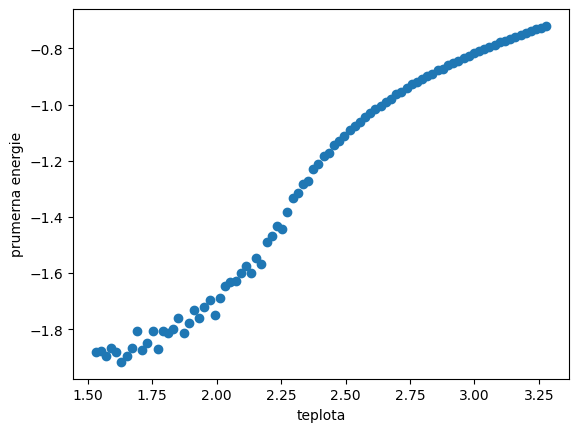

In [72]:
plt.scatter(teploty,prumerna_energie)
plt.xlabel('teplota')
plt.ylabel('prumerna energie')
plt.show();

Jestli dame abs pri vypoctu magn - dostaneme krivku ~

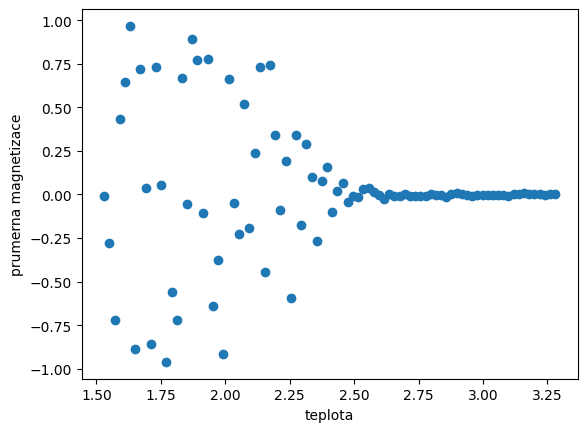

In [73]:
plt.scatter(teploty,prumerna_magnetizace)
plt.xlabel('teplota')
plt.ylabel('prumerna magnetizace')
plt.show();

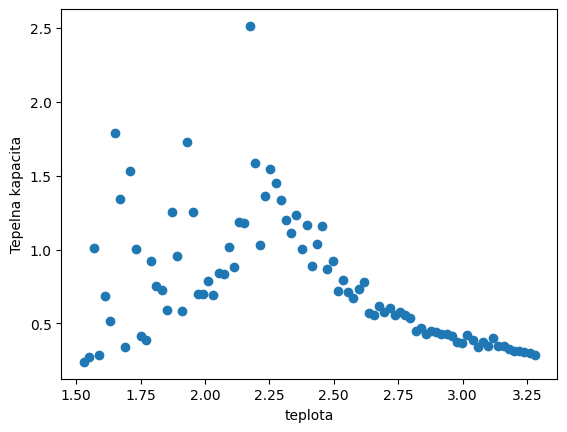

In [74]:
plt.scatter(teploty,tepelna_kapacita)
plt.xlabel('teplota')
plt.ylabel('Tepelna kapacita')
plt.show();

curieova teplota - teplota pri ktere dohazi zmema z paramagnet(neni magnetizovany magnet) na feromagnet (mag magnet)
neboli teplota pri ktere je nejvetsi tepelna kapacita    

In [75]:
idx = np.argmax(tepelna_kapacita, axis=0)
curieova_tep = teploty[idx]
print(curieova_tep)

2.17367816091954


# Vysledky pro 1/2 CT, 1 KP, 3/2 CT

sila externiho mag pole "h" - zvetsovat a snizovat silu magnetu
magnetic moment "u"

In [76]:
U = 1

In [77]:
def Mont_krok_ext_pole(mrizka,teplota, h):
    for idx in range(ROZMER_MRIZKY*ROZMER_MRIZKY):
        i= random.randint(0,ROZMER_MRIZKY-1) # posledni index
        j= random.randint(0,ROZMER_MRIZKY-1)
        mrizka[i][j] *= -1
        E = -2*mrizka[i][j] * ( mrizka[(i+1)%ROZMER_MRIZKY][j] + mrizka[(i-1)%ROZMER_MRIZKY][j] + mrizka[i][(j+1)%ROZMER_MRIZKY] + mrizka[i][(j-1)%ROZMER_MRIZKY] )  -  h * U * mrizka[i][j]
        
        if E>0: 
            r = random.random()
            if r > math.exp(-E / teplota ): 
                mrizka[i][j] *= -1
    return mrizka

In [78]:
def Magnetizace_vypoc(mrizka):
    magnetizace = 0
               
    for i in range(ROZMER_MRIZKY): # Magnetizace
        magnetizace += np.sum(mrizka[i], axis=0)
    return magnetizace

In [79]:
def gen_mriz(teplota, h1, h2, h3): #K
    mrizka = generovani_mrizky()
    
    #ekvilibrace
    pocet_ekv_kroku = 500
    for krok in range(pocet_ekv_kroku):
        mrizka = Mont_krok(mrizka, teplota) 

    # simulace
    sim_kroky = 500
    prumerna_magnetizace1 = prumerna_magnetizace2 = prumerna_magnetizace3 = 0
    magnetizace1 = []
    magnetizace2 = []
    magnetizace3 = []
    
    for h in h1:
        for krok in range(sim_kroky):
            mrizka = Mont_krok_ext_pole(mrizka, teplota, h)
            magnetizace = Magnetizace_vypoc(mrizka)
            
            prumerna_magnetizace1 += magnetizace

        prumerna_magnetizace1 = prumerna_magnetizace1 / (sim_kroky * ROZMER_MRIZKY**2)
        magnetizace1.append(prumerna_magnetizace1)

    for h in h2:
        for krok in range(sim_kroky):
            mrizka = Mont_krok_ext_pole(mrizka, teplota, h)
            magnetizace = Magnetizace_vypoc(mrizka)
            
            prumerna_magnetizace2 += magnetizace

        prumerna_magnetizace2 = prumerna_magnetizace2 / (sim_kroky * ROZMER_MRIZKY**2)
        magnetizace2.append(prumerna_magnetizace2)

    for h in h3:
        for krok in range(sim_kroky):
            mrizka = Mont_krok_ext_pole(mrizka, teplota, h)
            magnetizace = Magnetizace_vypoc(mrizka)
            
            prumerna_magnetizace3 += magnetizace

        prumerna_magnetizace3 = prumerna_magnetizace3 / (sim_kroky * ROZMER_MRIZKY**2)
        magnetizace3.append(prumerna_magnetizace3)


    
    return magnetizace1, magnetizace2, magnetizace3

In [80]:
def gen_mriz_pro_grafy(teplota):
    mrizka = generovani_mrizky()
    pocet_ekv_kroku = 1000
    
    for krok in range(pocet_ekv_kroku):
        mrizka = Mont_krok(mrizka, teplota) 
    
    return mrizka

## Zobrazeni

In [81]:
cur_teploty = [round(curieova_tep/2, 4), round(curieova_tep, 4), round(3*curieova_tep/2,4)]

feromagment - rikame kdyz mame domeny
zluta +1 - prin up...
jestli tvoreji ostruvky - velky magmet (feromagnet)

nad keriho tepoyou uz prestava byt magnetem - paramagnet 

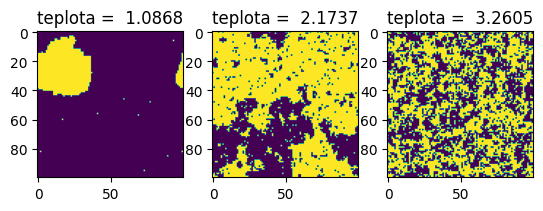

In [82]:
idx = 1
for teplota in cur_teploty:
    mrizka = gen_mriz_pro_grafy(teplota)
    plt.subplot(1, 3, idx)
    plt.imshow(mrizka)
    plt.title(f"teplota =  {teplota}")
    idx+=1

## hysterezni krivka

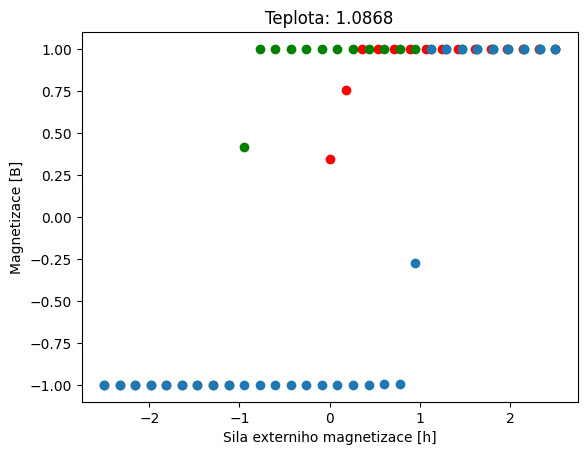

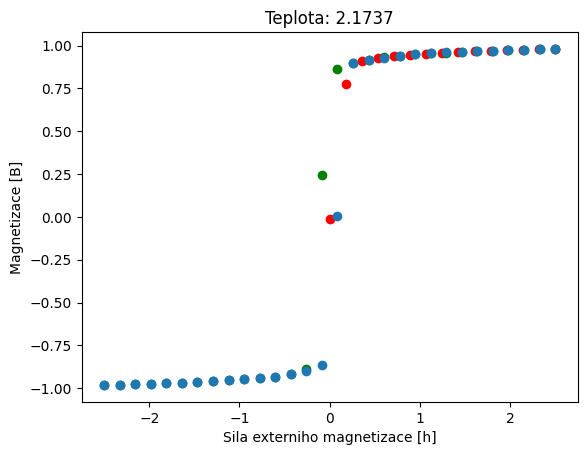

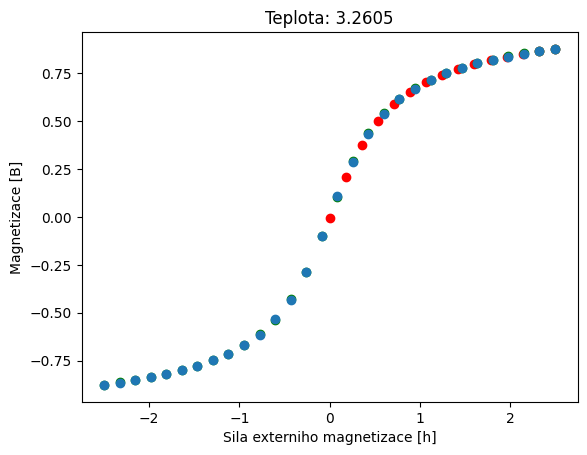

In [83]:
sila_externiho_mag_pole_1 = np.linspace(0, 2.5, 15)
sila_externiho_mag_pole_2 = np.linspace(2.5, -2.5, 30)
sila_externiho_mag_pole_3 = np.linspace(-2.5, 2.5, 30)

for teplota in cur_teploty:

    prumerna_magnetizace1, prumerna_magnetizace2, prumerna_magnetizace3 = gen_mriz(teplota, sila_externiho_mag_pole_1, sila_externiho_mag_pole_2, sila_externiho_mag_pole_3)    
    plt.title(f"Teplota: {teplota}" )
    plt.scatter(sila_externiho_mag_pole_1, prumerna_magnetizace1, color = "red" )
    plt.scatter(sila_externiho_mag_pole_2, prumerna_magnetizace2, color = "green" )
    plt.scatter(sila_externiho_mag_pole_3, prumerna_magnetizace3, label= "blue" )
    plt.xlabel("Sila externiho magnetizace [h]")
    plt.ylabel("Magnetizace [B]")
    plt.show()

In [84]:
# def grafy(sila_externiho_mag_pole, cur_teploty):
#     magnetizace_pro_teploty = {}

#     for teplota in cur_teploty:
#         magnetizace = []
#         for h in sila_externiho_mag_pole:
#             mag = gen_mriz(teplota,h)
#             magnetizace.append(mag)
#         magnetizace_pro_teploty[f'{teplota}'] = magnetizace
    
#     return magnetizace_pro_teploty

In [85]:
# magnetizace_pro_teploty = grafy(sila_externiho_mag_pole, cur_teploty)

In [86]:
# for i in range (3):
#     magnetizace_pro_teploty = grafy(sila_externiho_mag_pole, cur_teploty)
# plt.scatter(sila_externiho_mag_pole, magnetizace_pro_teploty[f"{cur_teploty[0]}"], color = "red")
# plt.scatter(sila_externiho_mag_pole, magnetizace_pro_teploty[f"{cur_teploty[1]}"], color = "blue")
# plt.scatter(sila_externiho_mag_pole, magnetizace_pro_teploty[f"{cur_teploty[2]}"], color = "green")
# plt.show()